# Example code for plotting spike snippets exported from raw data

Spike waveforms were retrieved from raw spikeGLX .bin file (before any filtering in catGT etc.), using spike times provided by kilosort results. 

See here for details:
https://djoshea.github.io/neuropixel-utils/waveforms/#extracting-waveforms-via-kilosortdataset

## Load data

The spikes.npz file was from a Neuropixels 1.0 probe, consisting of 20 units, 100 spikes each.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

spikes = np.load('spikes.npz')
time_ms = spikes['time_ms']
waveforms = spikes['waveform']

In [4]:
spikes

numpy.lib.npyio.NpzFile

`spikes['waveform']` is a numpy array with dimensions (n_time_bin, n_spikes_per_cell, n_cell).

In [9]:
spikes['waveform'].shape

(61, 100, 20)

In [12]:
spikes['time_ms'].shape

(61,)

Time is in $ms$, and spike waveform is in $\mu V$.

## Plot

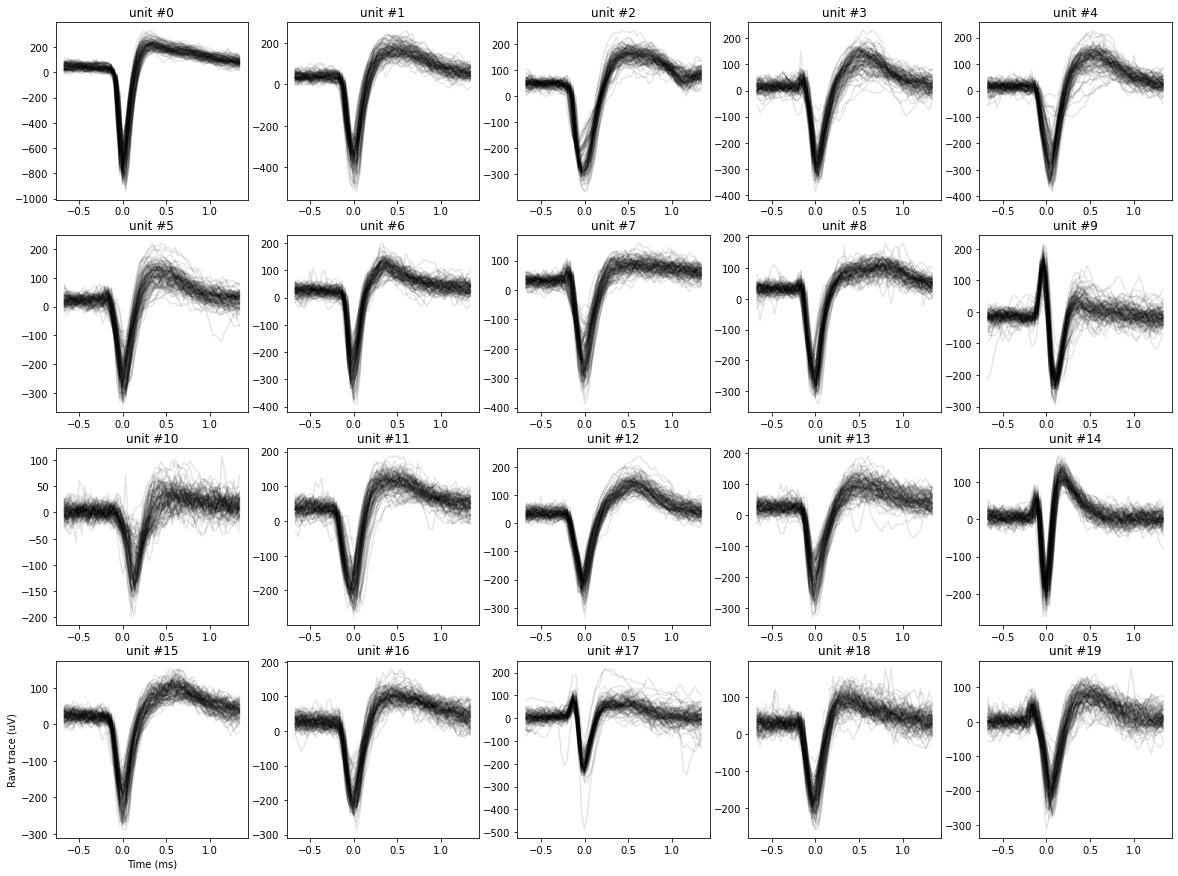

In [2]:
n_cells = waveforms.shape[2]
m = np.floor(np.sqrt(n_cells)).astype(int)
n = np.ceil(n_cells / m).astype(int)
fig, axs = plt.subplots(m, n, figsize=(m * 5, n * 3))

for i in range(n_cells):
    waveform = waveforms[:, :, i]
    ax = axs.flatten()[i]
    ax.plot(time_ms, waveforms[:, :, i], 'k', alpha=0.1)
    ax.set(title=f'unit #{i}')
    
    if i == (m - 1) * n:
        ax.set(xlabel='Time (ms)', ylabel='Raw trace (uV)')